# Imports 

In [107]:
#! pip install hijri-converter

In [108]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd
import cufflinks as cf
import sklearn
from sklearn import svm, preprocessing 
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
#cross validation imports 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#random forest 
from sklearn.ensemble import RandomForestRegressor
import math
from hijri_converter import Hijri, Gregorian
from hijri_converter import convert
from datetime import datetime
import csv
import codecs
import urllib.request
import urllib.error
import sys
import json 
import pandas as pd 
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingRegressor

# 14-15 season (data loading & removing NA)

In [109]:
df_14 = pd.read_csv('14-15S_clean.csv')

In [110]:
df_14.columns

Index(['Unnamed: 0', 'TeamA', 'TeamB', 'Stadium', 'Match_Day', 'Match_Time',
       'Match_Date', 'TeamA_Position', 'TeamB_Position', 'Attendance',
       'TeamA_goals', 'TeamB_goals'],
      dtype='object')

In [111]:
df_14.Stadium.value_counts()

King Fahd International Stadium       37
King Abdullah Sport City Stadium      28
Prince Abdullah bin Jalawi Stadium    25
King Abdullah Sports City             23
Al Majma'ah Sports City Stadium       13
Al-Shoalah Club Stadium               12
Al-Orobah Club Stadium                12
Al-Ukhdood Stadium                    11
Prince Mohamed bin Fahd Stadium        6
Prince Saud bin Jalawi Stadium         5
Al-Qadasiya Club Stadium               2
Prince Faisal bin Fahad Stadium        2
King Abdul Aziz Stadium                1
Name: Stadium, dtype: int64

In [112]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      177 non-null    int64  
 1   TeamA           177 non-null    object 
 2   TeamB           177 non-null    object 
 3   Stadium         177 non-null    object 
 4   Match_Day       177 non-null    int64  
 5   Match_Time      177 non-null    object 
 6   Match_Date      177 non-null    object 
 7   TeamA_Position  177 non-null    int64  
 8   TeamB_Position  177 non-null    int64  
 9   Attendance      174 non-null    float64
 10  TeamA_goals     177 non-null    int64  
 11  TeamB_goals     177 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 16.7+ KB


In [113]:
df_14.head()

,Unnamed: 0,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals
0,0,Al-Faisaly FC,Najran SC,Al Majma'ah Sports City Stadium,20,4:45 PM,3/22/15,6,10,53.0,0,1
1,0,Al-Faisaly FC,Al-Shoalah FC,Al Majma'ah Sports City Stadium,13,1:15 PM,12/19/14,6,13,66.0,0,0
2,0,Al-Shoalah FC,Al-Taawoun FC,Al-Shoalah Club Stadium,20,4:45 PM,3/22/15,14,7,73.0,4,3
3,0,Al-Faisaly FC,Al-Khaleej,Al Majma'ah Sports City Stadium,12,1:00 PM,12/12/14,6,11,79.0,1,2
4,0,Al-Shoalah FC,Al-Fateh,Al-Shoalah Club Stadium,8,5:00 PM,10/25/14,12,10,100.0,1,0


In [114]:
NA_df= df_14[df_14.isnull().any(axis=1)]

In [115]:
NA_df

,Unnamed: 0,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals
174,0,Al-Raed,Al-Orobah FC,King Abdullah Sport City Stadium,16,4:35 PM,2/21/15,9,12,NaN,2,1
175,0,Al-Taawoun FC,Al-Raed,King Abdullah Sport City Stadium,17,6:30 PM,2/28/15,6,10,NaN,3,1
176,0,Al-Fateh,Hajer Club,Prince Abdullah bin Jalawi Stadium,25,8:00 PM,5/10/15,6,10,NaN,3,1


In [116]:
df_14_clean=df_14.dropna()

In [117]:
df_14_clean=df_14_clean.drop("Unnamed: 0",axis=1)

In [118]:
df_14_clean[df_14_clean.isnull().any(axis=1)]

,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals


In [119]:
#grouped = df_14_clean.groupby(df_14_clean['TeamA'])
grouped = df_14_clean.sort_values(['Match_Day','TeamA'],ascending=True).groupby('TeamA')
my_df  = pd.DataFrame()
for i in df_14_clean['TeamA'].value_counts().index:
    a=grouped.get_group(i)
    a.loc[a["TeamA_goals"] > a["TeamB_goals"] , 'TeamA_win'] = 1
    a.loc[a["TeamA_goals"] <= a["TeamB_goals"] , 'TeamA_win'] = 0
    a.loc[a["TeamA_goals"] < a["TeamB_goals"] , 'TeamA_loss'] = 1
    a.loc[a["TeamA_goals"] >= a["TeamB_goals"] , 'TeamA_loss'] = 0
    a.loc[a["TeamA_goals"] != a["TeamB_goals"] , 'TeamA_draw'] = 0
    a.loc[a["TeamA_goals"] == a["TeamB_goals"] , 'TeamA_draw'] = 1
    
    a['TeamA_win_sum']=a["TeamA_win"].cumsum().shift(1)
    a['TeamA_loss_sum']=a["TeamA_loss"].cumsum().shift(1) 
    #a['sum_Attendance']=a["Attendance"].cumsum().shift(1)
    #a['avg_Attendance']=calculate_MA(a['Attendance'])
    a['sum_goals_A']=a["TeamA_goals"].cumsum().shift(1)
    a['TeamA_draw_sum']=a["TeamA_draw"].cumsum().shift(1)
    
    
    
    
    
    a['sum_goals_A']=a["sum_goals_A"].fillna(0)
    #a['sum_Attendance']=a['sum_Attendance'].fillna(0)
    a['TeamA_win_sum']=a["TeamA_win_sum"].fillna(0)
    a['TeamA_loss_sum']=a["TeamA_loss_sum"].fillna(0)
    a['TeamA_draw_sum']=a["TeamA_draw_sum"].fillna(0)
    
    my_df=my_df.append(a)
my_df=my_df.drop(["TeamA_loss","TeamA_win",'TeamA_draw'],axis=1)
df_14_clean=my_df

In [120]:
#grouped = df_14_clean.groupby(df_14_clean['TeamB',"Match_Day"])
grouped = df_14_clean.sort_values(['Match_Day','TeamB'],ascending=True).groupby('TeamB')
my_df  = pd.DataFrame()
for i in df_14_clean['TeamB'].value_counts().index:
    a=grouped.get_group(i)
    a.loc[a["TeamB_goals"] > a["TeamA_goals"] , 'TeamB_win'] = 1
    a.loc[a["TeamB_goals"] <= a["TeamA_goals"] , 'TeamB_win'] = 0
    a.loc[a["TeamB_goals"] < a["TeamA_goals"] , 'TeamB_loss'] = 1
    a.loc[a["TeamB_goals"] >= a["TeamA_goals"] , 'TeamB_loss'] = 0
    a.loc[a["TeamB_goals"] != a["TeamA_goals"] , 'TeamB_draw'] = 0
    a.loc[a["TeamB_goals"] == a["TeamA_goals"] , 'TeamB_draw'] = 1
    
    a['TeamB_win_sum']=a["TeamB_win"].cumsum().shift(1)
    a['TeamB_loss_sum']=a["TeamB_loss"].cumsum().shift(1) 
    a['sum_goals_B']=a["TeamB_goals"].cumsum().shift(1)
    a['TeamB_draw_sum']=a["TeamB_draw"].cumsum().shift(1)
    
    
    
    
    
    a['sum_goals_B']=a["sum_goals_B"].fillna(0)
    a['TeamB_win_sum']=a["TeamB_win_sum"].fillna(0)
    a['TeamB_loss_sum']=a["TeamB_loss_sum"].fillna(0)
    a['TeamB_draw_sum']=a["TeamB_draw_sum"].fillna(0)
    
    my_df=my_df.append(a)
my_df=my_df.drop(["TeamB_loss","TeamB_win",'TeamB_draw'],axis=1)
df_14_clean=my_df

In [121]:
df_14_clean

,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals,TeamA_win_sum,TeamA_loss_sum,sum_goals_A,TeamA_draw_sum,TeamB_win_sum,TeamB_loss_sum,sum_goals_B,TeamB_draw_sum
92,Al-Orobah FC,Al-Taawoun FC,Al-Orobah Club Stadium,1,6:40 PM,8/15/14,5,8,3741.0,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Hajer Club,Al-Taawoun FC,Prince Abdullah bin Jalawi Stadium,2,5:50 PM,8/22/14,8,13,199.0,2,0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
83,Al-Raed,Al-Taawoun FC,King Abdullah Sport City Stadium,4,7:25 PM,9/11/14,11,9,2531.0,0,0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0
11,Al-Faisaly FC,Al-Taawoun FC,Al Majma'ah Sports City Stadium,6,5:30 PM,9/27/14,6,9,183.0,2,2,2.0,0.0,3.0,0.0,0.0,2.0,3.0,1.0
151,Al-Hilal Saudi FC,Al-Taawoun FC,King Fahd International Stadium,8,6:50 PM,12/9/14,4,9,25000.0,3,1,3.0,1.0,9.0,1.0,0.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Najran SC,Al-Orobah FC,Al-Ukhdood Stadium,12,1:30 PM,12/13/14,8,12,557.0,2,0,1.0,2.0,5.0,1.0,0.0,5.0,3.0,1.0
74,Al-Taawoun FC,Al-Orobah FC,King Abdullah Sport City Stadium,14,4:30 PM,2/8/15,8,13,2000.0,1,1,2.0,3.0,9.0,1.0,0.0,6.0,3.0,1.0
10,Al-Faisaly FC,Al-Orobah FC,Al Majma'ah Sports City Stadium,18,4:45 PM,3/6/15,6,13,170.0,2,0,3.0,3.0,13.0,3.0,0.0,6.0,4.0,2.0
31,Al-Khaleej,Al-Orobah FC,Al-Qadasiya Club Stadium,21,5:40 PM,4/4/15,11,13,434.0,2,0,1.0,5.0,7.0,4.0,0.0,7.0,4.0,2.0


# 15-16 (data loading & removing NA)

In [122]:
df_15 = pd.read_csv('15-16S_clean.csv')

In [123]:
df_15.columns

Index(['Unnamed: 0', 'TeamA', 'TeamB', 'Stadium', 'Match_Day', 'Match_Time',
       'Match_Date', 'TeamA_Position', 'TeamB_Position', 'Attendance',
       'TeamA_goals', 'TeamB_goals'],
      dtype='object')

In [124]:
df_15.Stadium.value_counts()

King Fahd International Stadium       30
King Abdullah Sports City             28
King Abdullah Sport City Stadium      26
Prince Abdullah bin Jalawi Stadium    26
Prince Saud bin Jalawi Stadium        19
King Abdul Aziz Stadium               16
Al Majma'ah Sports City Stadium       13
Prince Faisal bin Fahad Stadium        9
Al-Ukhdood Stadium                     8
Prince Mohamed bin Fahd Stadium        7
Name: Stadium, dtype: int64

In [125]:
df_15.head()

,Unnamed: 0,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals
0,0,Al-Hilal Saudi FC,Al-Wehda FC,King Fahd International Stadium,1,7:45 PM,8/19/15,2,14,16883.0,2,0
1,0,Al-Khaleej,Al-Fateh,Prince Saud bin Jalawi Stadium,1,5:55 PM,8/20/15,13,3,315.0,0,2
2,0,Najran SC,Al-Ittihad Club (Jeddah),King Abdul Aziz Stadium,1,8:15 PM,8/20/15,10,4,4721.0,1,2
3,0,Al-Taawoun FC,Al-Ahli Saudi FC,King Abdullah Sport City Stadium,1,6:15 PM,8/21/15,8,6,2953.0,0,0
4,0,Al-Nassr Riad,Hajer Club,King Fahd International Stadium,1,8:15 PM,8/21/15,7,9,6173.0,0,0


In [126]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      182 non-null    int64  
 1   TeamA           182 non-null    object 
 2   TeamB           182 non-null    object 
 3   Stadium         182 non-null    object 
 4   Match_Day       182 non-null    int64  
 5   Match_Time      182 non-null    object 
 6   Match_Date      182 non-null    object 
 7   TeamA_Position  182 non-null    int64  
 8   TeamB_Position  182 non-null    int64  
 9   Attendance      180 non-null    float64
 10  TeamA_goals     182 non-null    int64  
 11  TeamB_goals     182 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.2+ KB


In [127]:
NA_df= df_15[df_15.isnull().any(axis=1)]

In [128]:
NA_df

,Unnamed: 0,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals
20,0,Al-Hilal Saudi FC,Al-Raed,King Fahd International Stadium,3,5:35 PM,9/20/15,1,14,NaN,1,0
80,0,Al-Nassr Riad,Al-Ittihad Club (Jeddah),King Fahd International Stadium,12,6:00 PM,12/14/15,6,4,NaN,3,0


In [129]:
df_15_clean=df_15.dropna()

In [130]:
df_15_clean=df_15_clean.drop("Unnamed: 0",axis=1)

In [131]:
df_15_clean[df_15_clean.isnull().any(axis=1)]

,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals


In [132]:
#grouped = df_14_clean.groupby(df_14_clean['TeamA'])
grouped = df_15_clean.sort_values(['Match_Day','TeamA'],ascending=True).groupby('TeamA')
my_df  = pd.DataFrame()
for i in df_15_clean['TeamA'].value_counts().index:
    a=grouped.get_group(i)
    a.loc[a["TeamA_goals"] > a["TeamB_goals"] , 'TeamA_win'] = 1
    a.loc[a["TeamA_goals"] <= a["TeamB_goals"] , 'TeamA_win'] = 0
    a.loc[a["TeamA_goals"] < a["TeamB_goals"] , 'TeamA_loss'] = 1
    a.loc[a["TeamA_goals"] >= a["TeamB_goals"] , 'TeamA_loss'] = 0
    a.loc[a["TeamA_goals"] != a["TeamB_goals"] , 'TeamA_draw'] = 0
    a.loc[a["TeamA_goals"] == a["TeamB_goals"] , 'TeamA_draw'] = 1
    
    a['TeamA_win_sum']=a["TeamA_win"].cumsum().shift(1)
    a['TeamA_loss_sum']=a["TeamA_loss"].cumsum().shift(1) 
   # a['sum_Attendance']=a["Attendance"].cumsum().shift(1)
   # a['avg_Attendance']=calculate_MA(a['Attendance'])
    a['sum_goals_A']=a["TeamA_goals"].cumsum().shift(1)
    a['TeamA_draw_sum']=a["TeamA_draw"].cumsum().shift(1)
    
    
    
    
    
    a['sum_goals_A']=a["sum_goals_A"].fillna(0)
    #a['sum_Attendance']=a['sum_Attendance'].fillna(0)
    a['TeamA_win_sum']=a["TeamA_win_sum"].fillna(0)
    a['TeamA_loss_sum']=a["TeamA_loss_sum"].fillna(0)
    a['TeamA_draw_sum']=a["TeamA_draw_sum"].fillna(0)
    
    my_df=my_df.append(a)
my_df=my_df.drop(["TeamA_loss","TeamA_win",'TeamA_draw'],axis=1)
df_15_clean=my_df

In [133]:
df_15_clean

,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals,TeamA_win_sum,TeamA_loss_sum,sum_goals_A,TeamA_draw_sum
1,Al-Khaleej,Al-Fateh,Prince Saud bin Jalawi Stadium,1,5:55 PM,8/20/15,13,3,315.0,0,2,0.0,0.0,0.0,0.0
7,Al-Khaleej,Al-Ahli Saudi FC,Prince Mohamed bin Fahd Stadium,2,5:45 PM,8/27/15,14,4,3127.0,0,4,0.0,1.0,0.0,0.0
29,Al-Khaleej,Al-Taawoun FC,Prince Mohamed bin Fahd Stadium,5,3:40 PM,10/29/15,10,5,268.0,1,1,0.0,2.0,0.0,0.0
42,Al-Khaleej,Najran SC,Prince Saud bin Jalawi Stadium,7,3:35 PM,11/7/15,6,14,220.0,3,1,0.0,2.0,1.0,1.0
60,Al-Khaleej,Al-Ittihad Club (Jeddah),Prince Mohamed bin Fahd Stadium,9,3:30 PM,11/27/15,8,4,3472.0,2,2,1.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Al-Nassr Riad,Al-Wehda FC,King Fahd International Stadium,18,6:40 PM,2/26/16,7,11,3096.0,1,1,2.0,1.0,7.0,4.0
142,Al-Nassr Riad,Al-Taawoun FC,King Fahd International Stadium,21,8:00 PM,4/1/16,8,4,2633.0,3,2,2.0,1.0,8.0,5.0
154,Al-Nassr Riad,Al-Raed,King Fahd International Stadium,23,5:55 PM,4/15/16,8,11,1838.0,1,2,3.0,1.0,11.0,5.0
164,Al-Nassr Riad,Al-Khaleej,King Fahd International Stadium,24,6:00 PM,4/23/16,8,7,1074.0,1,1,3.0,2.0,12.0,5.0


In [134]:
#grouped = df_14_clean.groupby(df_14_clean['TeamB',"Match_Day"])
grouped = df_15_clean.sort_values(['Match_Day','TeamB'],ascending=True).groupby('TeamB')
my_df  = pd.DataFrame()
for i in df_15_clean['TeamB'].value_counts().index:
    a=grouped.get_group(i)
    a.loc[a["TeamB_goals"] > a["TeamA_goals"] , 'TeamB_win'] = 1
    a.loc[a["TeamB_goals"] <= a["TeamA_goals"] , 'TeamB_win'] = 0
    a.loc[a["TeamB_goals"] < a["TeamA_goals"] , 'TeamB_loss'] = 1
    a.loc[a["TeamB_goals"] >= a["TeamA_goals"] , 'TeamB_loss'] = 0
    a.loc[a["TeamB_goals"] != a["TeamA_goals"] , 'TeamB_draw'] = 0
    a.loc[a["TeamB_goals"] == a["TeamA_goals"] , 'TeamB_draw'] = 1
    
    a['TeamB_win_sum']=a["TeamB_win"].cumsum().shift(1)
    a['TeamB_loss_sum']=a["TeamB_loss"].cumsum().shift(1) 
    a['sum_goals_B']=a["TeamB_goals"].cumsum().shift(1)
    a['TeamB_draw_sum']=a["TeamB_draw"].cumsum().shift(1)
    
    
    
    
    
    a['sum_goals_B']=a["sum_goals_B"].fillna(0)
    a['TeamB_win_sum']=a["TeamB_win_sum"].fillna(0)
    a['TeamB_loss_sum']=a["TeamB_loss_sum"].fillna(0)
    a['TeamB_draw_sum']=a["TeamB_draw_sum"].fillna(0)
    
    my_df=my_df.append(a)
my_df=my_df.drop(["TeamB_loss","TeamB_win",'TeamB_draw'],axis=1)
df_15_clean=my_df

# 16-17 season (data loading & removing NA)

In [135]:
df_16 = pd.read_csv('16-17S_clean.csv')

In [136]:
df_16.columns

Index(['Unnamed: 0', 'TeamA', 'TeamB', 'Stadium', 'Match_Day', 'Match_Time',
       'Match_Date', 'TeamA_Position', 'TeamB_Position', 'Attendance',
       'TeamA_goals', 'TeamB_goals'],
      dtype='object')

In [137]:
df_16.Stadium.value_counts()

King Fahd International Stadium       26
King Abdullah Sport City Stadium      26
King Abdullah Sports City             26
Prince Saud bin Jalawi Stadium        22
Prince Mohamed bin Fahd Stadium       17
Al Majma'ah Sports City Stadium       13
King Abdul Aziz Stadium               13
Al-Batin Club Stadium                 13
Prince Abdullah bin Jalawi Stadium    13
Prince Faisal bin Fahad Stadium       13
Name: Stadium, dtype: int64

In [138]:
df_16.head()

,Unnamed: 0,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals
0,0,Al-Shabab Club (Riyadh),Al-Qadsiah FC,King Fahd International Stadium,1,6:10 PM,8/11/16,6,7,1406.0,0,0
1,0,Al-Raed,Al-Ittihad Club (Jeddah),King Abdullah Sport City Stadium,1,8:05 PM,8/11/16,9,8,7017.0,2,3
2,0,Al-Faisaly FC,Al-Khaleej,Al Majma'ah Sports City Stadium,1,6:10 PM,8/12/16,3,11,214.0,3,1
3,0,Al-Wehda FC,Al-Taawoun FC,King Abdul Aziz Stadium,1,8:05 PM,8/12/16,5,10,681.0,3,2
4,0,Al-Nassr Riad,Al-Fateh,King Fahd International Stadium,1,8:05 PM,8/12/16,2,14,11264.0,4,1


In [139]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      182 non-null    int64  
 1   TeamA           182 non-null    object 
 2   TeamB           182 non-null    object 
 3   Stadium         182 non-null    object 
 4   Match_Day       182 non-null    int64  
 5   Match_Time      182 non-null    object 
 6   Match_Date      182 non-null    object 
 7   TeamA_Position  182 non-null    int64  
 8   TeamB_Position  182 non-null    int64  
 9   Attendance      180 non-null    float64
 10  TeamA_goals     182 non-null    int64  
 11  TeamB_goals     182 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.2+ KB


In [140]:
NA_df= df_16[df_16.isnull().any(axis=1)]

In [141]:
NA_df

,Unnamed: 0,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals
30,0,Al-Batin FC,Al-Raed,Al-Batin Club Stadium,5,6:10 PM,10/14/16,8,9,NaN,4,0
155,0,Al-Shabab Club (Riyadh),Al-Raed,King Fahd International Stadium,23,7:45 PM,4/13/17,5,6,NaN,1,2


In [142]:
df_16_clean=df_16.dropna()

In [143]:
df_16_clean=df_16_clean.drop("Unnamed: 0",axis=1)

In [144]:
df_16_clean[df_16_clean.isnull().any(axis=1)]

,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals


In [145]:
#grouped = df_14_clean.groupby(df_14_clean['TeamA'])
grouped = df_16_clean.sort_values(['Match_Day','TeamA'],ascending=True).groupby('TeamA')
my_df  = pd.DataFrame()
for i in df_16_clean['TeamA'].value_counts().index:
    a=grouped.get_group(i)
    a.loc[a["TeamA_goals"] > a["TeamB_goals"] , 'TeamA_win'] = 1
    a.loc[a["TeamA_goals"] <= a["TeamB_goals"] , 'TeamA_win'] = 0
    a.loc[a["TeamA_goals"] < a["TeamB_goals"] , 'TeamA_loss'] = 1
    a.loc[a["TeamA_goals"] >= a["TeamB_goals"] , 'TeamA_loss'] = 0
    a.loc[a["TeamA_goals"] != a["TeamB_goals"] , 'TeamA_draw'] = 0
    a.loc[a["TeamA_goals"] == a["TeamB_goals"] , 'TeamA_draw'] = 1
    
    a['TeamA_win_sum']=a["TeamA_win"].cumsum().shift(1)
    a['TeamA_loss_sum']=a["TeamA_loss"].cumsum().shift(1) 
   # a['sum_Attendance']=a["Attendance"].cumsum().shift(1)
    #a['avg_Attendance']=calculate_MA(a['Attendance'])
    a['sum_goals_A']=a["TeamA_goals"].cumsum().shift(1)
    a['TeamA_draw_sum']=a["TeamA_draw"].cumsum().shift(1)
    
    
    
    
    
    a['sum_goals_A']=a["sum_goals_A"].fillna(0)
    #a['sum_Attendance']=a['sum_Attendance'].fillna(0)
    a['TeamA_win_sum']=a["TeamA_win_sum"].fillna(0)
    a['TeamA_loss_sum']=a["TeamA_loss_sum"].fillna(0)
    a['TeamA_draw_sum']=a["TeamA_draw_sum"].fillna(0)
    
    my_df=my_df.append(a)
my_df=my_df.drop(["TeamA_loss","TeamA_win",'TeamA_draw'],axis=1)
df_16_clean=my_df

In [146]:
#grouped = df_14_clean.groupby(df_14_clean['TeamB',"Match_Day"])
grouped = df_16_clean.sort_values(['Match_Day','TeamB'],ascending=True).groupby('TeamB')
my_df  = pd.DataFrame()
for i in df_16_clean['TeamB'].value_counts().index:
    a=grouped.get_group(i)
    a.loc[a["TeamB_goals"] > a["TeamA_goals"] , 'TeamB_win'] = 1
    a.loc[a["TeamB_goals"] <= a["TeamA_goals"] , 'TeamB_win'] = 0
    a.loc[a["TeamB_goals"] < a["TeamA_goals"] , 'TeamB_loss'] = 1
    a.loc[a["TeamB_goals"] >= a["TeamA_goals"] , 'TeamB_loss'] = 0
    a.loc[a["TeamB_goals"] != a["TeamA_goals"] , 'TeamB_draw'] = 0
    a.loc[a["TeamB_goals"] == a["TeamA_goals"] , 'TeamB_draw'] = 1
    
    a['TeamB_win_sum']=a["TeamB_win"].cumsum().shift(1)
    a['TeamB_loss_sum']=a["TeamB_loss"].cumsum().shift(1) 
    a['sum_goals_B']=a["TeamB_goals"].cumsum().shift(1)
    a['TeamB_draw_sum']=a["TeamB_draw"].cumsum().shift(1)
    
    
    
    
    
    a['sum_goals_B']=a["sum_goals_B"].fillna(0)
    a['TeamB_win_sum']=a["TeamB_win_sum"].fillna(0)
    a['TeamB_loss_sum']=a["TeamB_loss_sum"].fillna(0)
    a['TeamB_draw_sum']=a["TeamB_draw_sum"].fillna(0)
    
    my_df=my_df.append(a)
my_df=my_df.drop(["TeamB_loss","TeamB_win",'TeamB_draw'],axis=1)
df_16_clean=my_df

# 17-18 season (data loading & removing NA)

In [147]:
df_17 = pd.read_csv('17-18S_clean.csv')

In [148]:
df_17.columns

Index(['Unnamed: 0', 'TeamA', 'TeamB', 'Stadium', 'Match_Day', 'Match_Time',
       'Match_Date', 'TeamA_Position', 'TeamB_Position', 'Attendance',
       'TeamA_goals', 'TeamB_goals'],
      dtype='object')

In [149]:
df_17.head()

,Unnamed: 0,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals
0,0,Al-Fateh,Al-Taawoun FC,Prince Abdullah bin Jalawi Stadium,1,6:00 PM,8/10/17,14,1,1814.0,1,4
1,0,Al-Hilal Saudi FC,Al-Fayha FC,King Fahd International Stadium,1,8:55 PM,8/10/17,4,11,9765.0,2,1
2,0,Al-Qadsiah FC,Al-Raed,Prince Saud bin Jalawi Stadium,1,6:00 PM,8/11/17,6,10,655.0,2,1
3,0,Al-Ittihad Club (Jeddah),Al-Batin FC,King Abdullah Sports City,1,7:55 PM,8/11/17,12,3,17018.0,1,3
4,0,Ettifaq FC,Al-Ahli Saudi FC,Prince Mohamed bin Fahd Stadium,1,7:55 PM,8/11/17,5,9,3722.0,2,1


In [150]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      182 non-null    int64  
 1   TeamA           182 non-null    object 
 2   TeamB           182 non-null    object 
 3   Stadium         182 non-null    object 
 4   Match_Day       182 non-null    int64  
 5   Match_Time      182 non-null    object 
 6   Match_Date      182 non-null    object 
 7   TeamA_Position  182 non-null    int64  
 8   TeamB_Position  182 non-null    int64  
 9   Attendance      178 non-null    float64
 10  TeamA_goals     182 non-null    int64  
 11  TeamB_goals     182 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.2+ KB


In [151]:
NA_df= df_17[df_17.isnull().any(axis=1)]

In [152]:
NA_df

,Unnamed: 0,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals
7,0,Al-Taawoun FC,Al-Hilal Saudi FC,King Abdullah Sport City Stadium,2,7:50 PM,8/15/17,6,2,NaN,3,4
58,0,Al-Qadsiah FC,Al-Taawoun FC,Prince Saud bin Jalawi Stadium,9,3:35 PM,11/1/17,7,9,NaN,1,0
75,0,Al-Fateh,Al-Faisaly FC,Prince Abdullah bin Jalawi Stadium,11,6:30 PM,11/25/17,6,3,NaN,0,5
114,0,Al-Taawoun FC,Al-Raed,King Abdullah Sport City Stadium,17,4:15 PM,1/12/18,8,14,NaN,2,2


In [153]:
df_17_clean=df_17.dropna()

In [154]:
df_17_clean=df_17_clean.drop("Unnamed: 0",axis=1)

In [155]:
df_17_clean[df_17_clean.isnull().any(axis=1)]

,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals


In [156]:
#grouped = df_14_clean.groupby(df_14_clean['TeamA'])
grouped = df_17_clean.sort_values(['Match_Day','TeamA'],ascending=True).groupby('TeamA')
my_df  = pd.DataFrame()
for i in df_17_clean['TeamA'].value_counts().index:
    a=grouped.get_group(i)
    a.loc[a["TeamA_goals"] > a["TeamB_goals"] , 'TeamA_win'] = 1
    a.loc[a["TeamA_goals"] <= a["TeamB_goals"] , 'TeamA_win'] = 0
    a.loc[a["TeamA_goals"] < a["TeamB_goals"] , 'TeamA_loss'] = 1
    a.loc[a["TeamA_goals"] >= a["TeamB_goals"] , 'TeamA_loss'] = 0
    a.loc[a["TeamA_goals"] != a["TeamB_goals"] , 'TeamA_draw'] = 0
    a.loc[a["TeamA_goals"] == a["TeamB_goals"] , 'TeamA_draw'] = 1
    
    a['TeamA_win_sum']=a["TeamA_win"].cumsum().shift(1)
    a['TeamA_loss_sum']=a["TeamA_loss"].cumsum().shift(1) 
   # a['sum_Attendance']=a["Attendance"].cumsum().shift(1)
   # a['avg_Attendance']=calculate_MA(a['Attendance'])
    a['sum_goals_A']=a["TeamA_goals"].cumsum().shift(1)
    a['TeamA_draw_sum']=a["TeamA_draw"].cumsum().shift(1)
    
    
    
    
    
    a['sum_goals_A']=a["sum_goals_A"].fillna(0)
    #a['sum_Attendance']=a['sum_Attendance'].fillna(0)
    a['TeamA_win_sum']=a["TeamA_win_sum"].fillna(0)
    a['TeamA_loss_sum']=a["TeamA_loss_sum"].fillna(0)
    a['TeamA_draw_sum']=a["TeamA_draw_sum"].fillna(0)
    
    my_df=my_df.append(a)
my_df=my_df.drop(["TeamA_loss","TeamA_win",'TeamA_draw'],axis=1)
df_17_clean=my_df

In [157]:
#grouped = df_14_clean.groupby(df_14_clean['TeamB',"Match_Day"])
grouped = df_17_clean.sort_values(['Match_Day','TeamB'],ascending=True).groupby('TeamB')
my_df  = pd.DataFrame()
for i in df_17_clean['TeamB'].value_counts().index:
    a=grouped.get_group(i)
    a.loc[a["TeamB_goals"] > a["TeamA_goals"] , 'TeamB_win'] = 1
    a.loc[a["TeamB_goals"] <= a["TeamA_goals"] , 'TeamB_win'] = 0
    a.loc[a["TeamB_goals"] < a["TeamA_goals"] , 'TeamB_loss'] = 1
    a.loc[a["TeamB_goals"] >= a["TeamA_goals"] , 'TeamB_loss'] = 0
    a.loc[a["TeamB_goals"] != a["TeamA_goals"] , 'TeamB_draw'] = 0
    a.loc[a["TeamB_goals"] == a["TeamA_goals"] , 'TeamB_draw'] = 1
    
    a['TeamB_win_sum']=a["TeamB_win"].cumsum().shift(1)
    a['TeamB_loss_sum']=a["TeamB_loss"].cumsum().shift(1) 
    a['sum_goals_B']=a["TeamB_goals"].cumsum().shift(1)
    a['TeamB_draw_sum']=a["TeamB_draw"].cumsum().shift(1)
    
    
    
    
    
    a['sum_goals_B']=a["sum_goals_B"].fillna(0)
    a['TeamB_win_sum']=a["TeamB_win_sum"].fillna(0)
    a['TeamB_loss_sum']=a["TeamB_loss_sum"].fillna(0)
    a['TeamB_draw_sum']=a["TeamB_draw_sum"].fillna(0)
    
    my_df=my_df.append(a)
my_df=my_df.drop(["TeamB_loss","TeamB_win",'TeamB_draw'],axis=1)
df_17_clean=my_df

# combine all seasons

In [158]:
df_17_clean.columns

Index(['TeamA', 'TeamB', 'Stadium', 'Match_Day', 'Match_Time', 'Match_Date',
       'TeamA_Position', 'TeamB_Position', 'Attendance', 'TeamA_goals',
       'TeamB_goals', 'TeamA_win_sum', 'TeamA_loss_sum', 'sum_goals_A',
       'TeamA_draw_sum', 'TeamB_win_sum', 'TeamB_loss_sum', 'sum_goals_B',
       'TeamB_draw_sum'],
      dtype='object')

In [159]:
data = df_17_clean.append(df_16_clean)

In [160]:
data = data.append(df_14_clean)

In [161]:
data = data.append(df_15_clean)

In [162]:
data

,TeamA,TeamB,Stadium,Match_Day,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,TeamB_goals,TeamA_win_sum,TeamA_loss_sum,sum_goals_A,TeamA_draw_sum,TeamB_win_sum,TeamB_loss_sum,sum_goals_B,TeamB_draw_sum
1,Al-Hilal Saudi FC,Al-Fayha FC,King Fahd International Stadium,1,8:55 PM,8/10/17,4,11,9765.0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,Al-Nassr Riad,Al-Fayha FC,Prince Faisal bin Fahad Stadium,4,7:20 PM,9/22/17,7,13,3014.0,2,2,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0
39,Al-Faisaly FC,Al-Fayha FC,Al Majma'ah Sports City Stadium,6,7:00 PM,10/14/17,4,11,2316.0,2,1,2.0,1.0,6.0,0.0,0.0,1.0,3.0,1.0
42,Al-Qadsiah FC,Al-Fayha FC,Prince Saud bin Jalawi Stadium,7,4:50 PM,10/19/17,9,11,741.0,1,1,1.0,0.0,3.0,1.0,0.0,2.0,4.0,1.0
57,Al-Ahli Saudi FC,Al-Fayha FC,King Abdullah Sports City,9,5:45 PM,10/31/17,2,12,9774.0,1,1,3.0,0.0,13.0,1.0,0.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Al-Fateh,Al-Raed,Prince Abdullah bin Jalawi Stadium,17,4:15 PM,2/20/16,6,13,541.0,1,0,2.0,2.0,6.0,4.0,1.0,4.0,9.0,2.0
126,Al-Khaleej,Al-Raed,Prince Saud bin Jalawi Stadium,19,4:25 PM,3/4/16,7,13,507.0,1,0,1.0,4.0,8.0,4.0,1.0,5.0,9.0,2.0
147,Al-Wehda FC,Al-Raed,King Abdul Aziz Stadium,22,8:00 PM,4/7/16,10,12,759.0,3,1,3.0,5.0,9.0,3.0,1.0,6.0,9.0,2.0
154,Al-Nassr Riad,Al-Raed,King Fahd International Stadium,23,5:55 PM,4/15/16,8,11,1838.0,1,2,3.0,1.0,11.0,5.0,1.0,7.0,10.0,2.0


In [163]:
data=data.rename(columns={"Match_Day":"Round"})

# Feature engineering

## Data/Time features

In [164]:
# pd.to_datetime(df['time'], format='%H:%M').dt.hour
data['Match_hour']=pd.to_datetime(data['Match_Time'], format='  %H:%M %p').dt.hour

In [165]:
data['Match_minute']=pd.to_datetime(data['Match_Time'], format='  %H:%M %p').dt.minute

In [166]:
data.head()

,TeamA,TeamB,Stadium,Round,Match_Time,Match_Date,TeamA_Position,TeamB_Position,Attendance,TeamA_goals,...,TeamA_win_sum,TeamA_loss_sum,sum_goals_A,TeamA_draw_sum,TeamB_win_sum,TeamB_loss_sum,sum_goals_B,TeamB_draw_sum,Match_hour,Match_minute
1,Al-Hilal Saudi FC,Al-Fayha FC,King Fahd International Stadium,1,8:55 PM,8/10/17,4,11,9765.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,55
24,Al-Nassr Riad,Al-Fayha FC,Prince Faisal bin Fahad Stadium,4,7:20 PM,9/22/17,7,13,3014.0,2,...,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,7,20
39,Al-Faisaly FC,Al-Fayha FC,Al Majma'ah Sports City Stadium,6,7:00 PM,10/14/17,4,11,2316.0,2,...,2.0,1.0,6.0,0.0,0.0,1.0,3.0,1.0,7,0
42,Al-Qadsiah FC,Al-Fayha FC,Prince Saud bin Jalawi Stadium,7,4:50 PM,10/19/17,9,11,741.0,1,...,1.0,0.0,3.0,1.0,0.0,2.0,4.0,1.0,4,50
57,Al-Ahli Saudi FC,Al-Fayha FC,King Abdullah Sports City,9,5:45 PM,10/31/17,2,12,9774.0,1,...,3.0,0.0,13.0,1.0,0.0,2.0,5.0,2.0,5,45


In [167]:
data=data.drop("Match_Time",axis=1)

In [168]:
data['Match_month']=pd.to_datetime(data['Match_Date'], format=' %m/%d/%y').dt.month

In [169]:
data['Match_day']=pd.to_datetime(data['Match_Date'], format=' %m/%d/%y').dt.day

In [170]:
data['Match_year']=pd.to_datetime(data['Match_Date'], format=' %m/%d/%y').dt.year

In [171]:
data['Match_day_name']=pd.to_datetime(data['Match_Date'], format=' %m/%d/%y').dt.day_name()

In [172]:
data=data.drop("TeamA_goals",axis=1)

In [173]:
data=data.drop("TeamB_goals",axis=1)

In [174]:




def get_hijri_day(data): 
    return convert.Gregorian(datetime.strptime(data, ' %m/%d/%y').year, datetime.strptime(data, ' %m/%d/%y').month, datetime.strptime(data, ' %m/%d/%y').day).to_hijri().day
def get_hijri_month(data): 
    return convert.Gregorian(datetime.strptime(data, ' %m/%d/%y').year, datetime.strptime(data, ' %m/%d/%y').month, datetime.strptime(data, ' %m/%d/%y').day).to_hijri().month
    

In [175]:
data['Match_date_hijri_day']=data['Match_Date'].apply(get_hijri_day)
data['Match_date_hijri_month']=data['Match_Date'].apply(get_hijri_month)


In [176]:
data=data.drop("Match_Date",axis=1)

In [177]:
data.head()

,TeamA,TeamB,Stadium,Round,TeamA_Position,TeamB_Position,Attendance,TeamA_win_sum,TeamA_loss_sum,sum_goals_A,...,sum_goals_B,TeamB_draw_sum,Match_hour,Match_minute,Match_month,Match_day,Match_year,Match_day_name,Match_date_hijri_day,Match_date_hijri_month
1,Al-Hilal Saudi FC,Al-Fayha FC,King Fahd International Stadium,1,4,11,9765.0,0.0,0.0,0.0,...,0.0,0.0,8,55,8,10,2017,Thursday,18,11
24,Al-Nassr Riad,Al-Fayha FC,Prince Faisal bin Fahad Stadium,4,7,13,3014.0,0.0,0.0,2.0,...,1.0,0.0,7,20,9,22,2017,Friday,2,1
39,Al-Faisaly FC,Al-Fayha FC,Al Majma'ah Sports City Stadium,6,4,11,2316.0,2.0,1.0,6.0,...,3.0,1.0,7,0,10,14,2017,Saturday,24,1
42,Al-Qadsiah FC,Al-Fayha FC,Prince Saud bin Jalawi Stadium,7,9,11,741.0,1.0,0.0,3.0,...,4.0,1.0,4,50,10,19,2017,Thursday,29,1
57,Al-Ahli Saudi FC,Al-Fayha FC,King Abdullah Sports City,9,2,12,9774.0,3.0,0.0,13.0,...,5.0,2.0,5,45,10,31,2017,Tuesday,11,2


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 181
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TeamA                   712 non-null    object 
 1   TeamB                   712 non-null    object 
 2   Stadium                 712 non-null    object 
 3   Round                   712 non-null    int64  
 4   TeamA_Position          712 non-null    int64  
 5   TeamB_Position          712 non-null    int64  
 6   Attendance              712 non-null    float64
 7   TeamA_win_sum           712 non-null    float64
 8   TeamA_loss_sum          712 non-null    float64
 9   sum_goals_A             712 non-null    float64
 10  TeamA_draw_sum          712 non-null    float64
 11  TeamB_win_sum           712 non-null    float64
 12  TeamB_loss_sum          712 non-null    float64
 13  sum_goals_B             712 non-null    float64
 14  TeamB_draw_sum          712 non-null    fl

In [179]:
data.columns

Index(['TeamA', 'TeamB', 'Stadium', 'Round', 'TeamA_Position',
       'TeamB_Position', 'Attendance', 'TeamA_win_sum', 'TeamA_loss_sum',
       'sum_goals_A', 'TeamA_draw_sum', 'TeamB_win_sum', 'TeamB_loss_sum',
       'sum_goals_B', 'TeamB_draw_sum', 'Match_hour', 'Match_minute',
       'Match_month', 'Match_day', 'Match_year', 'Match_day_name',
       'Match_date_hijri_day', 'Match_date_hijri_month'],
      dtype='object')

# Weather Data 

## Get weather as a function 

This function will ask for `stadium`, `date`, `API Key`  and it will match the stadium name to its internal coordinates dictionary to return weather information as a dataframe

In [180]:
#for testing purposes only
def getCoord(stadium, is_df = False,): 
    stadium_coor = {
      "Prince Sultan bin Abdul Aziz Stadium": "18.13,42.30",
      "King Abdullah Sport City Stadium": "26.20,43.58",
      "King Fahd International Stadium": "24.38,46.43", 
      "King Abdullah Sports City": "21.32,39.10", 
        "King Salman Bin Abdulaziz Sport City Stadium": "25.54,45.20", 
        "Al-Hazem Club Stadium":"25.52,43.30", 
        "Mrsool Park":"24.38,46.43", 
        "Prince Mohamed bin Fahd Stadium":"26.26,50.06", 
        "Al Majma'ah Sports City Stadium":"25.54,45.20",
        "Al-Batin Club Stadium":"28.26,45.57", 
        "Prince Abdullah bin Jalawi Stadium":"25.23,49.36", 
        "Prince Abdul Aziz bin Musa'ed Stadium":"27.31,41.41", 
        "Prince Abdullah al-Faisal Stadium":"21.32,39.10", 
        "Prince Faisal bin Fahad Stadium":"24.38,46.43",
        "Prince Saud bin Jalawi Stadium": "26.17,50.12", 
        "King Abdul Aziz Stadium": "21.25,39.49", 
        "Al-Okhdood Club Stadium":"17.35,44.14", 
        "Prince Mohammed bin Abdul Aziz Stadium":"24.28,39.36", 
        "Al-Shoalah Club Stadium":"24.09,47.20", 
        "Al-Orobah Club Stadium":"29.58,40.12", 
        "Al-Qadasiya Club Stadium":"26.17,50.12", 
        "Al-Ukhdood Stadium":"17.59,44.24"
    }
    result = {
        "first column":stadium_coor[stadium], 
        "second column": stadium_coor[stadium]
    }
    df = pd.DataFrame(result,index=[0])
    if is_df: 
        return df
    else: 
        return [stadium_coor[stadium],stadium_coor[stadium]]

In [181]:

def getWeather(stadium,date,APIKey, is_df = False): 
    stadium_coor = {
      "Prince Sultan bin Abdul Aziz Stadium": "18.13,42.30",
      "King Abdullah Sport City Stadium": "26.20,43.58",
      "King Fahd International Stadium": "24.38,46.43", 
      "King Abdullah Sports City": "21.32,39.10", 
        "King Salman Bin Abdulaziz Sport City Stadium": "25.54,45.20", 
        "Al-Hazem Club Stadium":"25.52,43.30", 
        "Mrsool Park":"24.38,46.43", 
        "Prince Mohamed bin Fahd Stadium":"26.26,50.06", 
        "Al Majma'ah Sports City Stadium":"25.54,45.20",
        "Al-Batin Club Stadium":"28.26,45.57", 
        "Prince Abdullah bin Jalawi Stadium":"25.23,49.36", 
        "Prince Abdul Aziz bin Musa'ed Stadium":"27.31,41.41", 
        "Prince Abdullah al-Faisal Stadium":"21.32,39.10", 
        "Prince Faisal bin Fahad Stadium":"24.38,46.43",
        "Prince Saud bin Jalawi Stadium": "26.17,50.12", 
        "King Abdul Aziz Stadium": "21.25,39.49", 
        "Al-Okhdood Club Stadium":"17.35,44.14", 
        "Prince Mohammed bin Abdul Aziz Stadium":"24.28,39.36", 
        "Al-Shoalah Club Stadium":"24.09,47.20", 
        "Al-Orobah Club Stadium":"29.58,40.12", 
        "Al-Qadasiya Club Stadium":"26.17,50.12", 
        "Al-Ukhdood Stadium":"17.59,44.24"
    }
    BaseURL = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/'

    #ApiKey='QB74HR5MKL7LTF4JKU3YVWTXE'
    ApiKey = APIKey
    #UnitGroup sets the units of the output - us or metric
    UnitGroup='metric'

    #Location for the weather data
    #Location='Washington,DC'
    #Location='18.13,42.30'
    Location=stadium_coor[stadium]
    #Optional start and end dates
    #If nothing is specified, the forecast is retrieved. 
    #If start date only is specified, a single historical or forecast day will be retrieved
    #If both start and and end date are specified, a date range will be retrieved
    #StartDate = '2022-08-19'
    #EndDate='2022-08-19'
    StartDate = date
    EndDate= date
    
    #JSON or CSV 
    #JSON format supports daily, hourly, current conditions, weather alerts and events in a single JSON package
    #CSV format requires an 'include' parameter below to indicate which table section is required
    ContentType="json"

    #include sections
    #values include days,hours,current,alerts
    Include="days"
    #basic query including location
    ApiQuery=BaseURL + Location

    #append the start and end date if present
    if (len(StartDate)):
        ApiQuery+="/"+StartDate
        if (len(EndDate)):
            ApiQuery+="/"+EndDate

    #Url is completed. Now add query parameters (could be passed as GET or POST)
    ApiQuery+="?"

    #append each parameter as necessary
    if (len(UnitGroup)):
        ApiQuery+="&unitGroup="+UnitGroup

    if (len(ContentType)):
        ApiQuery+="&contentType="+ContentType

    if (len(Include)):
        ApiQuery+="&include="+Include

    ApiQuery+="&key="+ApiKey
    print(' - Running query URL: ', ApiQuery)
    print()

    try: 
        CSVBytes = urllib.request.urlopen(ApiQuery)
    except urllib.error.HTTPError  as e:
        ErrorInfo= e.read().decode() 
        print('Error code: ', e.code, ErrorInfo)
        sys.exit()
    except  urllib.error.URLError as e:
        ErrorInfo= e.read().decode() 
        print('Error code: ', e.code,ErrorInfo)
        sys.exit()
    #weatherData will have the weather data information as a json object
    weatherData = json.loads(CSVBytes.read().decode('utf-8')) 
    #printing the data we will pass in a dataframe
    print("feelslike",weatherData['days'][0]['feelslike'])
    print("feelslikemax",weatherData['days'][0]['feelslikemax'])
    print("feelslikemin",weatherData['days'][0]['feelslikemin'])
    print("temp max:",weatherData['days'][0]['tempmax'])
    print("temp min:",weatherData['days'][0]['tempmin'])
    print("humidity:",weatherData['days'][0]['humidity'])
    print("precip:",weatherData['days'][0]['precip'])
    print("preciptype:",weatherData['days'][0]['preciptype'])
    print("visibility:",weatherData['days'][0]['visibility'])
    print("solarradiation:",weatherData['days'][0]['solarradiation'])
    print("solarenergy:",weatherData['days'][0]['solarenergy'])
    print("uvindex:",weatherData['days'][0]['uvindex'])
    print("windspeed:",weatherData['days'][0]['windspeed'])
    print("conditions:",weatherData['days'][0]['conditions'])
    print("description:",weatherData['days'][0]['description'])
    

    weatherDataDic = {
        "feelslike":weatherData['days'][0]['feelslike'],
        "feelslikemax":weatherData['days'][0]['feelslikemax'],
        "feelslikemin":weatherData['days'][0]['feelslikemin'],
        "temp max:":weatherData['days'][0]['tempmax'],
        "temp min:":weatherData['days'][0]['tempmin'],
        "humidity:":weatherData['days'][0]['humidity'],
        "precip:":weatherData['days'][0]['precip'],
        "preciptype:":weatherData['days'][0]['preciptype'],
        "visibility:":weatherData['days'][0]['visibility'],
        "solarradiation:":weatherData['days'][0]['solarradiation'],
        "solarenergy:":weatherData['days'][0]['solarenergy'],
        "uvindex:":weatherData['days'][0]['uvindex'],
        "windspeed:":weatherData['days'][0]['windspeed'],
        "conditions:":weatherData['days'][0]['conditions'],
        "description:":weatherData['days'][0]['description']
    }
    df = pd.DataFrame(weatherDataDic,index=[0])
    if is_df: 
        return df 
    else: 
        return [weatherData['days'][0]['feelslike'],
        weatherData['days'][0]['feelslikemax'],
        weatherData['days'][0]['feelslikemin'],
        weatherData['days'][0]['tempmax'],
        weatherData['days'][0]['tempmin'],
        weatherData['days'][0]['humidity'],
        weatherData['days'][0]['precip'],
        weatherData['days'][0]['preciptype'],
        weatherData['days'][0]['visibility'],
        weatherData['days'][0]['solarradiation'],
        weatherData['days'][0]['solarenergy'],
        weatherData['days'][0]['uvindex'],
        weatherData['days'][0]['windspeed'],
        weatherData['days'][0]['conditions'],
        weatherData['days'][0]['description']  
        ]

In [182]:
#test = getWeather("Mrsool Park","2022-8-19","VVA8DQVK8H47EKAV4N32F3HNL")

In [183]:
#test

In [184]:
data.columns

Index(['TeamA', 'TeamB', 'Stadium', 'Round', 'TeamA_Position',
       'TeamB_Position', 'Attendance', 'TeamA_win_sum', 'TeamA_loss_sum',
       'sum_goals_A', 'TeamA_draw_sum', 'TeamB_win_sum', 'TeamB_loss_sum',
       'sum_goals_B', 'TeamB_draw_sum', 'Match_hour', 'Match_minute',
       'Match_month', 'Match_day', 'Match_year', 'Match_day_name',
       'Match_date_hijri_day', 'Match_date_hijri_month'],
      dtype='object')

## Applying the getWether function to the entire dataframe 

In [185]:
col_names = ["feelslike",
        "feelslikemax",
        "feelslikemin",
        "temp max:",
        "temp min:",
        "humidity:",
        "precip:",
        "preciptype:",
        "visibility:",
        "solarradiation:",
        "solarenergy:",
        "uvindex:",
        "windspeed:",
        "conditions:",
        "description:"]

In [186]:
#ap_test = data.apply(lambda row:pd.Series(getWeather(row["Stadium"],str(row["Match_year"])+"-"+str(row["Match_month"])+"-"+str(row["Match_day"]),"VVA8DQVK8H47EKAV4N32F3HNL"), index=col_names),  axis = 1, result_type='expand')

In [187]:
#weatherData = ap_test
#weatherData

In [188]:
#data = pd.concat([data,weatherData], axis = 1)

In [189]:
data

,TeamA,TeamB,Stadium,Round,TeamA_Position,TeamB_Position,Attendance,TeamA_win_sum,TeamA_loss_sum,sum_goals_A,...,sum_goals_B,TeamB_draw_sum,Match_hour,Match_minute,Match_month,Match_day,Match_year,Match_day_name,Match_date_hijri_day,Match_date_hijri_month
1,Al-Hilal Saudi FC,Al-Fayha FC,King Fahd International Stadium,1,4,11,9765.0,0.0,0.0,0.0,...,0.0,0.0,8,55,8,10,2017,Thursday,18,11
24,Al-Nassr Riad,Al-Fayha FC,Prince Faisal bin Fahad Stadium,4,7,13,3014.0,0.0,0.0,2.0,...,1.0,0.0,7,20,9,22,2017,Friday,2,1
39,Al-Faisaly FC,Al-Fayha FC,Al Majma'ah Sports City Stadium,6,4,11,2316.0,2.0,1.0,6.0,...,3.0,1.0,7,0,10,14,2017,Saturday,24,1
42,Al-Qadsiah FC,Al-Fayha FC,Prince Saud bin Jalawi Stadium,7,9,11,741.0,1.0,0.0,3.0,...,4.0,1.0,4,50,10,19,2017,Thursday,29,1
57,Al-Ahli Saudi FC,Al-Fayha FC,King Abdullah Sports City,9,2,12,9774.0,3.0,0.0,13.0,...,5.0,2.0,5,45,10,31,2017,Tuesday,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Al-Fateh,Al-Raed,Prince Abdullah bin Jalawi Stadium,17,6,13,541.0,2.0,2.0,6.0,...,9.0,2.0,4,15,2,20,2016,Saturday,11,5
126,Al-Khaleej,Al-Raed,Prince Saud bin Jalawi Stadium,19,7,13,507.0,1.0,4.0,8.0,...,9.0,2.0,4,25,3,4,2016,Friday,24,5
147,Al-Wehda FC,Al-Raed,King Abdul Aziz Stadium,22,10,12,759.0,3.0,5.0,9.0,...,9.0,2.0,8,0,4,7,2016,Thursday,29,6
154,Al-Nassr Riad,Al-Raed,King Fahd International Stadium,23,8,11,1838.0,3.0,1.0,11.0,...,10.0,2.0,5,55,4,15,2016,Friday,8,7


In [190]:
#data.to_csv('data_with_weather_with_goals.csv') # come here

In [191]:
data = pd.read_csv('data_with_weather_with_goals_edited_stadium.csv')

In [192]:
data.columns

Index(['Unnamed: 0', 'TeamA', 'TeamB', 'Stadium', 'Round', 'TeamA_Position',
       'TeamB_Position', 'Attendance', 'TeamA_win_sum', 'TeamA_loss_sum',
       'sum_goals_A', 'TeamA_draw_sum', 'TeamB_win_sum', 'TeamB_loss_sum',
       'sum_goals_B', 'TeamB_draw_sum', 'Match_hour', 'Match_minute',
       'Match_month', 'Match_day', 'Match_year', 'Match_day_name',
       'Match_date_hijri_day', 'Match_date_hijri_month', 'feelslike',
       'feelslikemax', 'feelslikemin', 'temp max:', 'temp min:', 'humidity:',
       'precip:', 'preciptype:', 'visibility:', 'solarradiation:',
       'solarenergy:', 'uvindex:', 'windspeed:', 'conditions:',
       'description:'],
      dtype='object')

In [193]:
data=data.drop(['Unnamed: 0','preciptype:'],axis=1)

In [194]:
data

,TeamA,TeamB,Stadium,Round,TeamA_Position,TeamB_Position,Attendance,TeamA_win_sum,TeamA_loss_sum,sum_goals_A,...,temp min:,humidity:,precip:,visibility:,solarradiation:,solarenergy:,uvindex:,windspeed:,conditions:,description:
0,Al-Hilal Saudi FC,Al-Fayha FC,King Fahd International Stadium,1,4,11,9765,0,0,0,...,27.0,8.1,0.0,10.0,324.3,28.0,10,22.3,Clear,Clear conditions throughout the day.
1,Al-Nassr Riad,Al-Fayha FC,Prince Faisal bin Fahad Stadium,4,7,13,3014,0,0,2,...,23.9,10.9,0.0,9.7,293.2,25.2,10,27.7,Clear,Clear conditions throughout the day.
2,Al-Faisaly FC,Al-Fayha FC,Al Majma'ah Sports City Stadium,6,4,11,2316,2,1,6,...,20.2,14.1,0.0,NaN,260.7,22.3,9,18.0,Clear,Clear conditions throughout the day.
3,Al-Qadsiah FC,Al-Fayha FC,Prince Saud bin Jalawi Stadium,7,9,11,741,1,0,3,...,17.6,55.9,0.0,9.9,232.9,20.2,8,27.3,Clear,Clear conditions throughout the day.
4,Al-Ahli Saudi FC,Al-Fayha FC,King Abdullah Sports City,9,2,12,9774,3,0,13,...,27.0,63.7,0.0,10.0,225.5,19.5,8,22.1,Clear,Clear conditions throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Al-Fateh,Al-Raed,Prince Abdullah bin Jalawi Stadium,17,6,13,541,2,2,6,...,10.0,26.0,0.0,10.0,258.3,22.2,9,33.5,Clear,Clear conditions throughout the day.
708,Al-Khaleej,Al-Raed,Prince Saud bin Jalawi Stadium,19,7,13,507,1,4,8,...,17.8,58.6,0.0,8.5,215.0,18.6,9,22.1,Clear,Clear conditions throughout the day.
709,Al-Wehda FC,Al-Raed,King Abdul Aziz Stadium,22,10,12,759,3,5,9,...,25.0,54.3,0.0,10.0,302.5,26.2,10,18.4,Clear,Clear conditions throughout the day.
710,Al-Nassr Riad,Al-Raed,King Fahd International Stadium,23,8,11,1838,3,1,11,...,16.0,36.0,0.0,7.9,338.8,29.3,10,14.8,Clear,Clear conditions throughout the day.


In [195]:
#To account for changes in the stadium name
data.loc[data["Stadium"] == "King Salman Bin Abdulaziz Sport City Stadium","Stadium" ] = "Al Majma'ah Sports City Stadium"

# Add stadiums information

In [196]:
Capacity = pd.read_csv("Stadiums Mapped with Capacity.csv")
#Capacity=Capacity[["Stadium","Capacity"]]
#Capacity
Capacity.columns

Index(['Stadium', 'City', 'Capacity', 'Established in'], dtype='object')

In [197]:

CapacityDict = dict(zip(Capacity.Stadium, Capacity.Capacity))
CityDict = dict(zip(Capacity.Stadium, Capacity.City))
EstablishedDict = dict(zip(Capacity.Stadium, Capacity['Established in']))

CapacityDict

{'King Fahd International Stadium': 68752,
 'Prince Faisal bin Fahad Stadium': 22500,
 "Al Majma'ah Sports City Stadium": 7000,
 'Prince Saud bin Jalawi Stadium': 15000,
 'King Abdullah Sports City': 63000,
 'King Abdullah Sport City Stadium': 25000,
 'Prince Mohammed bin Abdul Aziz Stadium': 24000,
 'Prince Mohamed bin Fahd Stadium': 26000,
 'Prince Abdullah bin Jalawi Stadium': 19550,
 'Al-Batin Club Stadium': 6000,
 'King Salman Bin Abdulaziz Sport City Stadium': 7000,
 'King Abdul Aziz Stadium': 38000,
 'Mrsool Park': 25000,
 'Al-Shoalah Club Stadium': 8000,
 'Al-Orobah Club Stadium': 7000,
 'Al-Ukhdood Stadium': 3000,
 'Al-Qadasiya Club Stadium': 5000}

In [198]:
data['Capacity']=data["Stadium"].map(CapacityDict)
data['City']=data["Stadium"].map(CityDict)
data['Established_in']=data["Stadium"].map(EstablishedDict)


data[['Capacity','City','Established_in']]

,Capacity,City,Established_in
0,68752,Riyadh,1987
1,22500,Riyadh,1971
2,7000,Al Majma'ah,1980
3,15000,Khobar,1982
4,63000,Jeddah,2014
...,...,...,...
707,19550,Al-Hasa,1983
708,15000,Khobar,1982
709,38000,Mecca,1984
710,68752,Riyadh,1987


In [199]:
data.columns

Index(['TeamA', 'TeamB', 'Stadium', 'Round', 'TeamA_Position',
       'TeamB_Position', 'Attendance', 'TeamA_win_sum', 'TeamA_loss_sum',
       'sum_goals_A', 'TeamA_draw_sum', 'TeamB_win_sum', 'TeamB_loss_sum',
       'sum_goals_B', 'TeamB_draw_sum', 'Match_hour', 'Match_minute',
       'Match_month', 'Match_day', 'Match_year', 'Match_day_name',
       'Match_date_hijri_day', 'Match_date_hijri_month', 'feelslike',
       'feelslikemax', 'feelslikemin', 'temp max:', 'temp min:', 'humidity:',
       'precip:', 'visibility:', 'solarradiation:', 'solarenergy:', 'uvindex:',
       'windspeed:', 'conditions:', 'description:', 'Capacity', 'City',
       'Established_in'],
      dtype='object')

## Drop colinear features (threshold =0.7)

In [200]:
# calculate correlation matrix 
cor_matrix = data.corr().abs()

In [201]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

C:\Users\fagfa\AppData\Local\Temp/ipykernel_56160/3673341754.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [202]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

In [203]:
# features to drop
print(to_drop)

['TeamA_win_sum', 'sum_goals_A', 'sum_goals_B', 'TeamB_draw_sum', 'feelslikemax', 'feelslikemin', 'temp max:', 'temp min:', 'solarenergy:', 'uvindex:']


In [204]:
data=data.drop(to_drop, axis=1)


# Data pre-processing

In [205]:
# label_encoder object
label_encoder =LabelEncoder()
label_encoder_stadium =LabelEncoder()
label_encoder_match_day_name =LabelEncoder()
label_encoder_con =LabelEncoder()
label_encoder_match_day_name =LabelEncoder()
label_encoder_desc =LabelEncoder()
label_encoder_city =LabelEncoder()

# Encode labels in column. 
data['Stadium_encoded']= label_encoder_stadium.fit_transform(data['Stadium'])
data['match_day_name_encoded']= label_encoder_match_day_name.fit_transform(data['Match_day_name'])
data['TeamA_encoded']= label_encoder.fit_transform(data['TeamA'])
data['TeamB_encoded']= label_encoder.fit_transform(data['TeamB'])
data['City_encoded']=label_encoder_city.fit_transform(data['City'])
#weather stuff 
data['conditions_encoded']= label_encoder_con.fit_transform(data['conditions:'])
data['description_encoded']= label_encoder_desc.fit_transform(data['description:'])
#data['preciptype_encoded']= label_encoder.fit_transform(data['preciptype:'])    
data[['TeamA_encoded','TeamA','TeamB_encoded','TeamB','Stadium_encoded','Stadium','conditions_encoded','conditions:','description_encoded','description:']][0:30]

,TeamA_encoded,TeamA,TeamB_encoded,TeamB,Stadium_encoded,Stadium,conditions_encoded,conditions:,description_encoded,description:
0,5,Al-Hilal Saudi FC,4,Al-Fayha FC,9,King Fahd International Stadium,0,Clear,5,Clear conditions throughout the day.
1,8,Al-Nassr Riad,4,Al-Fayha FC,12,Prince Faisal bin Fahad Stadium,0,Clear,5,Clear conditions throughout the day.
2,2,Al-Faisaly FC,4,Al-Fayha FC,0,Al Majma'ah Sports City Stadium,0,Clear,5,Clear conditions throughout the day.
3,10,Al-Qadsiah FC,4,Al-Fayha FC,15,Prince Saud bin Jalawi Stadium,0,Clear,5,Clear conditions throughout the day.
4,0,Al-Ahli Saudi FC,4,Al-Fayha FC,8,King Abdullah Sports City,0,Clear,5,Clear conditions throughout the day.
5,11,Al-Raed,4,Al-Fayha FC,7,King Abdullah Sport City Stadium,2,Partially cloudy,19,Partly cloudy throughout the day.
6,6,Al-Ittihad Club (Jeddah),4,Al-Fayha FC,8,King Abdullah Sports City,0,Clear,5,Clear conditions throughout the day.
7,14,Al-Taawoun FC,4,Al-Fayha FC,7,King Abdullah Sport City Stadium,0,Clear,5,Clear conditions throughout the day.
8,19,Ohod Al-Medina,4,Al-Fayha FC,14,Prince Mohammed bin Abdul Aziz Stadium,0,Clear,5,Clear conditions throughout the day.
9,16,Ettifaq FC,4,Al-Fayha FC,13,Prince Mohamed bin Fahd Stadium,0,Clear,5,Clear conditions throughout the day.


In [206]:
data.columns

Index(['TeamA', 'TeamB', 'Stadium', 'Round', 'TeamA_Position',
       'TeamB_Position', 'Attendance', 'TeamA_loss_sum', 'TeamA_draw_sum',
       'TeamB_win_sum', 'TeamB_loss_sum', 'Match_hour', 'Match_minute',
       'Match_month', 'Match_day', 'Match_year', 'Match_day_name',
       'Match_date_hijri_day', 'Match_date_hijri_month', 'feelslike',
       'humidity:', 'precip:', 'visibility:', 'solarradiation:', 'windspeed:',
       'conditions:', 'description:', 'Capacity', 'City', 'Established_in',
       'Stadium_encoded', 'match_day_name_encoded', 'TeamA_encoded',
       'TeamB_encoded', 'City_encoded', 'conditions_encoded',
       'description_encoded'],
      dtype='object')

In [207]:
# drop encoded features + match time 
data=data.drop(['TeamA','TeamB','Stadium','Match_day_name','conditions:','description:','City','Match_minute','Match_hour'],axis=1)
#,"TeamB_Position" ,'Match_minute','Match_hour', 'TeamB_Position'

In [208]:
data['visibility:'].fillna(data['visibility:'].mode()[0], inplace=True)

In [209]:
data.isna().sum()

Round                     0
TeamA_Position            0
TeamB_Position            0
Attendance                0
TeamA_loss_sum            0
TeamA_draw_sum            0
TeamB_win_sum             0
TeamB_loss_sum            0
Match_month               0
Match_day                 0
Match_year                0
Match_date_hijri_day      0
Match_date_hijri_month    0
feelslike                 0
humidity:                 0
precip:                   0
visibility:               0
solarradiation:           0
windspeed:                0
Capacity                  0
Established_in            0
Stadium_encoded           0
match_day_name_encoded    0
TeamA_encoded             0
TeamB_encoded             0
City_encoded              0
conditions_encoded        0
description_encoded       0
dtype: int64

In [210]:
target = data.pop('Attendance')
target=np.log(target)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1234)

# ML models with K-Fold cross validation to select best model

##  1- HistGradient Boosting Regressor

In [211]:


# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#model = HistGradientBoostingRegressor(random_state=4,max_depth=3,min_samples_leaf=4)
model = HistGradientBoostingRegressor(random_state=0,max_depth=3,min_samples_leaf=7)
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.763 (0.038)
best score: 0.8267563363864212


## 2- Random Foreset

In [212]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestRegressor(max_depth=7, random_state=0,n_estimators=100,min_samples_split=5,min_samples_leaf=3)
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.721 (0.037)
best score: 0.7811224979706874


## 3- Polynomial

In [213]:


scaler = preprocessing.StandardScaler()
#scaler = preprocessing.RobustScaler()
degree=1
polyreg_scaled=make_pipeline(scaler,PolynomialFeatures(degree),LinearRegression())

In [214]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = polyreg_scaled
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.515 (0.054)
best score: 0.6238253494586619


## 4- Knn

### KNN select best K

In [215]:

scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()
neighbors = np.arange(1, 20, 2)
scores=[]
for k in neighbors:    
    knn_scaled=make_pipeline(scaler,KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=2))
    knn_scaled.fit(X_train, y_train)
    score = cross_val_score(knn_scaled,data, target, cv = cv,scoring='r2')
    scores.append(score.mean())

In [216]:
mse = scores

In [217]:
trace0 = go.Scatter(
    y = mse,
    x = neighbors, # np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(150, 10, 10)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'CV Error',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')

In [258]:
knn_scaled=make_pipeline(scaler,KNeighborsRegressor(n_neighbors = 9,  weights = 'distance', p=1))

In [259]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = knn_scaled
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.597 (0.065)
best score: 0.6832663501867897


## 5- SVR

### Hyperparameter tuning

In [267]:


 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'epsilon': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']}
 
grid = GridSearchCV(SVR(), param_grid, refit = True,scoring='r2',cv=cv, n_jobs=-1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [1, 0.1, 0.01, 0.001, 0.0001],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='r2')

In [268]:
#print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

print(grid.best_score_)

{'C': 10, 'epsilon': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=10, epsilon=1, gamma=0.0001)
0.49249841025632773


### SVR model

In [356]:

SVR_scaled=make_pipeline(scaler,SVR(kernel='rbf',C=10,gamma= 0.01,epsilon=0.5))

#SVR_scaled=make_pipeline(scaler,
#                         PCA(n_components=7),
#                         SVR(kernel='rbf',C=160,gamma= 0.01,epsilon=0.5))

In [357]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = SVR_scaled
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.632 (0.044)
best score: 0.6886139816855383


## 6- Elasticnet

In [368]:

ela_scaled=make_pipeline(scaler,ElasticNet(random_state=0,l1_ratio=0.1))

In [369]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = ela_scaled
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.414 (0.034)
best score: 0.4606877901807125


## 7- PLS

In [226]:

pls_scaled=make_pipeline(scaler,PLSRegression(n_components=3))

In [227]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = pls_scaled
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.513 (0.053)
best score: 0.6306655149036685


## 8- Feature selection + KNN

In [228]:

# think about PCA
"""knn_scaled=make_pipeline(scaler,
                         SelectFromModel(LinearSVC(penalty="l2"),max_features=10),
                         KNeighborsRegressor(n_neighbors = 9,  weights = 'distance', p=1))"""
knn_scaled=make_pipeline(scaler,
                         PCA(n_components=7),
                         KNeighborsRegressor(n_neighbors = 12,  weights = 'distance', p=1))

In [229]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = knn_scaled
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.555 (0.046)
best score: 0.6379703676421069


## 9- xgboost

### Hyperparameter tuning

In [379]:

params = {'max_depth': [2,4, 6, 8, 10,12],
              'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'n_estimators': [25,50,100, 200,400,800]
 #        ,     'num_class': [10]
              }

xgbclf = xgb.XGBRegressor(objective="reg:squarederror", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='r2', cv=cv,
                             n_jobs=-1,
                             verbose=1)

clf.fit(data, target)

best_combination = clf.best_params_

# {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
# {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.1}
best_params = best_combination

print("Best hyperparameter combination: ", best_params)
print(clf.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameter combination:  {'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.1}
0.7435667090974093


### XGBRegressor model

In [231]:
xgbr = xgb.XGBRegressor(
                      #silent=False, 
                      #scale_pos_weight=1,
                      learning_rate=0.1,  
    tree_method='hist',
                      #colsample_bytree = 0.4,
#                      subsample = 0.8,
                      objective='reg:squarederror', 
                      n_estimators=100, 
                     # reg_alpha = 0.3,
                      max_depth=3
   # ,                    gamma=10
) 



In [232]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = xgbr
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.756 (0.035)
best score: 0.8091313250881316


# 10- GBR

In [233]:

baseline = GradientBoostingRegressor(random_state=0,n_estimators= 50, max_depth=3, learning_rate=0.3)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = baseline
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.743 (0.042)
best score: 0.8144064943079992


## 11- MLP

In [234]:

MLP_scaled=make_pipeline(scaler,
                         MLPRegressor(hidden_layer_sizes=(10,10),activation="relu" ,random_state=1, max_iter=2000,learning_rate='adaptive'))






In [235]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = MLP_scaled
# evaluate model
scores = cross_val_score(model, data, target, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
print('best score:', max(scores))

R2: 0.438 (0.076)
best score: 0.5778580398827091


# Model testing

### KNN predictions

In [236]:
knn_scaled=make_pipeline(scaler,KNeighborsRegressor(n_neighbors = 7,  weights = 'distance', p=2))
knn_scaled.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))


R2 Score:  0.5869649624960317


In [237]:
trace0 = go.Scatter(
    y = y_test,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Actual Attendance',
    marker = dict(
    color = 'rgb(10, 150, 50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Predicted Attendance',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Attendance')
)

figure = go.Figure(data = [trace0, trace1], layout = layout)
iplot(figure)

## Polynomial predictions

In [238]:
#scaler = preprocessing.StandardScaler()
degree=1
polyreg_scaled=make_pipeline(scaler,PolynomialFeatures(degree),LinearRegression())
polyreg_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [239]:
y_pred = polyreg_scaled.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.49792524142007877


In [240]:
trace0 = go.Scatter(
    y = y_test,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Actual Attendance',
    marker = dict(
    color = 'rgb(10, 150, 50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Predicted Attendance',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Attendance')
)

figure = go.Figure(data = [trace0, trace1], layout = layout)
iplot(figure)

## XGBRegressor predictions

In [404]:

regr = xgb.XGBRegressor(
                      #silent=False, 
                      #scale_pos_weight=1,
                      learning_rate=0.1,  
    tree_method='hist',
                      #colsample_bytree = 0.4,
#                      subsample = 0.8,
                      objective='reg:squarederror', 
                      n_estimators=500, 
                     # reg_alpha = 0.3,
                      max_depth=3
   # ,                    gamma=10
) 


regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
print("R2 Score Train: ", r2_score(y_train, y_pred))

R2 Score Train:  0.9877758109095075


In [405]:

y_pred = regr.predict(X_test)
print("R2 Score Test: ", r2_score(y_test, y_pred))


R2 Score Test:  0.7419709438752904


In [406]:
ser_result=pd.Series(y_pred)
y_test_inverse=y_test.apply(math.exp)
y_test_inverse=y_test_inverse.astype(int)
y_pred=ser_result.apply(math.exp)
y_pred=y_pred.astype(int)


In [407]:
trace0 = go.Scatter(
    y = y_test_inverse,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Actual Attendance',
    marker = dict(
    color = 'rgb(10, 150, 50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Predicted Attendance',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Attendance')
)

figure = go.Figure(data = [trace0, trace1], layout = layout)
iplot(figure)

## Residual analysis for XGBRegressor model

we did this analysis only for XGBRegressor model because it has high R2 value, we can apply same analysis to other models.

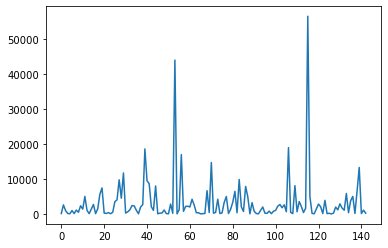

In [408]:

res=abs(y_pred.values-y_test_inverse.values)
#res=y_test-y_pred
#res_plt=res.reset_index(drop = True, inplace = False)
plt.plot(res)

In [409]:
X_test_inverse=X_test.copy()

In [410]:
# inverse all label encoder
X_test_inverse['Stadium']= label_encoder_stadium.inverse_transform(X_test['Stadium_encoded'])
X_test_inverse['match_day_name']= label_encoder_match_day_name.inverse_transform(X_test['match_day_name_encoded'])
X_test_inverse['TeamA']= label_encoder.inverse_transform(X_test['TeamA_encoded'])
X_test_inverse['TeamB']= label_encoder.inverse_transform(X_test['TeamB_encoded'])
#weather stuff 
X_test_inverse['conditions']= label_encoder_con.inverse_transform(X_test['conditions_encoded'])
X_test_inverse['description']= label_encoder_desc.inverse_transform(X_test['description_encoded'])
X_test_inverse["res"]=res
X_test_inverse["actual_att"]=y_test_inverse.values
X_test_inverse["predicted_att"]=y_pred.values
X_test_inverse=X_test_inverse.drop(['TeamA_encoded','TeamB_encoded','Stadium_encoded','match_day_name_encoded','conditions_encoded','description_encoded'],axis=1)

## Residual distribution

In [411]:
X_test_inverse[['res',"actual_att",'predicted_att']].describe()

,res,actual_att,predicted_att
count,143.000000,143.000000,143.000000
mean,3198.573427,6817.552448,6772.069930
std,6736.987700,11036.840054,11984.023796
min,2.000000,53.000000,76.000000
25%,219.500000,963.500000,903.000000
50%,1121.000000,2767.000000,2516.000000
75%,3253.500000,7820.500000,6719.500000
max,56547.000000,59174.000000,87582.000000


In [412]:

# sort data frame based on residuals value(decending)
#X_test_inverse=X_test_inverse.sort_values("res",ascending=False)
# select columns for further testing
X_test_inverse[['Round', 'TeamA_Position',
        'Match_year', 'feelslike',
        'humidity:',
        'Stadium', 'match_day_name', 'TeamA', 'TeamB',"res","actual_att","predicted_att"]][:20]
#'Match_hour', 'Match_month', , 'TeamB_Position' ,
#       'Match_date_hijri_day' , 'Match_date_hijri_month'

,Round,TeamA_Position,Match_year,feelslike,humidity:,Stadium,match_day_name,TeamA,TeamB,res,actual_att,predicted_att
430,15,7,2015,19.6,22.9,Al Majma'ah Sports City Stadium,Thursday,Al-Faisaly FC,Al-Ittihad Club (Jeddah),115,1064,949
653,9,2,2015,28.9,45.2,King Abdullah Sports City,Thursday,Al-Ahli Saudi FC,Al-Faisaly FC,2587,18936,21523
643,16,13,2016,14.1,52.3,King Abdullah Sport City Stadium,Thursday,Al-Raed,Al-Hilal Saudi FC,943,12324,13267
267,22,8,2017,26.3,49.2,Prince Mohamed bin Fahd Stadium,Saturday,Ettifaq FC,Al-Khaleej,118,1330,1448
536,11,12,2015,16.4,60.8,Prince Saud bin Jalawi Stadium,Friday,Al-Qadsiah FC,Al-Fateh,55,444,389
309,4,13,2016,32.7,42.3,Prince Saud bin Jalawi Stadium,Thursday,Al-Qadsiah FC,Al-Hilal Saudi FC,955,5820,4865
148,15,3,2017,13.7,30.8,Al Majma'ah Sports City Stadium,Thursday,Al-Faisaly FC,Al-Raed,98,612,514
296,5,12,2016,37.1,52.7,King Abdul Aziz Stadium,Saturday,Al-Wehda FC,Al-Nassr Riad,1093,2275,1182
386,9,6,2015,15.2,16.1,Al Majma'ah Sports City Stadium,Wednesday,Al-Faisaly FC,Al-Hilal Saudi FC,464,1443,979
543,23,4,2016,24.3,37.7,King Abdullah Sport City Stadium,Sunday,Al-Taawoun FC,Al-Fateh,2326,6998,4672


In [413]:
X_test_inverse.to_csv('actualvspredicted.csv')

## Residuals > 10,000

In [414]:
# to select specfic values for residuals
res_threshold=X_test_inverse.loc[X_test_inverse['res']>10000.0]

In [415]:
# residual disribution for stadium
res_threshold.Stadium.value_counts()

King Abdullah Sports City          6
King Fahd International Stadium    2
Name: Stadium, dtype: int64

In [416]:
# residual disribution for host team
res_threshold.TeamA.value_counts()

Al-Ahli Saudi FC            4
Al-Hilal Saudi FC           2
Al-Ittihad Club (Jeddah)    2
Name: TeamA, dtype: int64

In [417]:
# residual disribution for teamB (vistor)
res_threshold.TeamB.value_counts()

Al-Nassr Riad               2
Al-Ittihad Club (Jeddah)    2
Al-Qadsiah FC               1
Al-Faisaly FC               1
Al-Shabab Club (Riyadh)     1
Al-Khaleej                  1
Name: TeamB, dtype: int64

## Feature importance

In [418]:
importances = regr.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

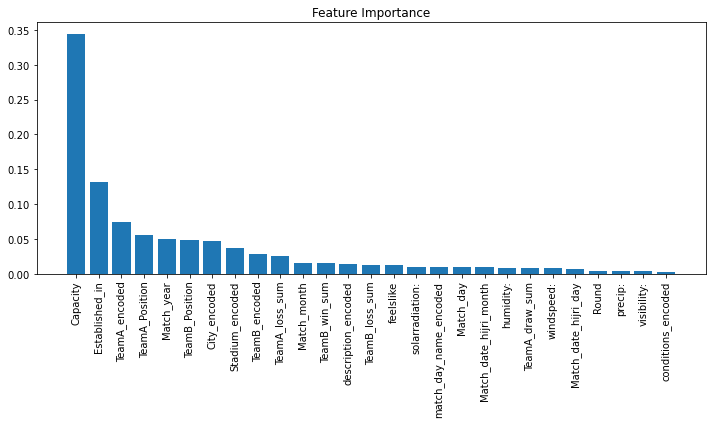

In [419]:
import matplotlib.pyplot as plt
 

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()